### Traffic flow

In [8]:
import sympy
from sympy import init_printing
import numpy 
import matplotlib.pyplot as plt
init_printing()
%matplotlib inline

In [35]:
# initial problem parameters:
Vmax = 80     # maximum velocity [km/hr]
L = 11        # length of road [km]
rho_max = 250 # maximum car density [cars/km]

# discretization
nx = 50       # number of x steps
dx = L/(nx-1)
dt = 0.001    # time step
nt = 100      # number of time steps

# initial conditions
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
rho_n = numpy.ones(nx)
# Boundary condition rho(x = 0,t) = 10

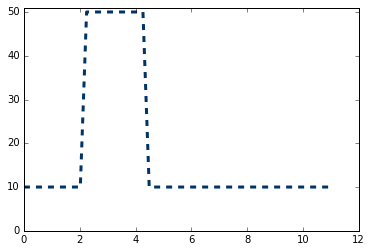

In [15]:
plt.plot(x,rho0,color='#003366', ls='--', lw=3)
plt.ylim(0,51);

In [4]:
# Functions
# Flux:
def F(rho):
    return Vmax*rho*(1-rho/rho_max)

# Velocity:
def velocity(rho):
    return Vmax*(1-rho/rho_max)

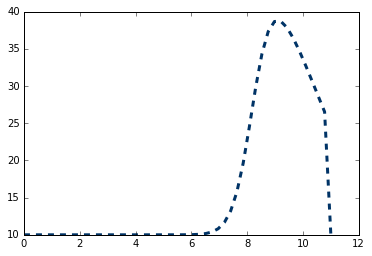

In [36]:
for n in range(nt):
    rho_n = rho0.copy()
    rho0[1:-1] = rho_n[1:-1] - dt/dx*(F(rho_n[1:-1]) - F(rho_n[0:-2]))
    
plt.plot(x,rho0,color='#003366', ls='--', lw=3);

In [37]:
rho0

array([ 10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.00000001,  10.00000004,  10.00000025,  10.00000131,
        10.00000615,  10.00002616,  10.00010141,  10.00036076,
        10.00118562,  10.00362075,  10.01032854,  10.02765218,
        10.06977868,  10.16657804,  10.37725302,  10.81164215,
        11.65727263,  13.1970083 ,  15.77247331,  19.61925218,
        24.56448965,  29.83173668,  34.33452333,  37.31733489,
        38.66863638,  38.7067898 ,  37.84560366,  36.4212727 ,
        34.66275751,  32.71621968,  30.67486934,  28.60069597,
        26.53791545,  10.        ])

In [31]:
10*80*(1-10/250)